In [1]:
import torch
from transformers import BertTokenizer, BertModel

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/home/poorna/anaconda3/envs/bsi_env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [14]:
text = "[CLS] The quick brown fox jumps over the lazy dog. [SEP]"

tokens = tokenizer.tokenize(text)

print(f"Tokens are {tokens}")

token_ids = tokenizer.convert_tokens_to_ids(tokens)

token_ids = torch.tensor([token_ids])

Tokens are ['[CLS]', 'the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', '[SEP]']


In [8]:
token_embeddings = model.embeddings.word_embeddings

In [15]:
token = "the"

token_id = tokenizer.convert_tokens_to_ids(token)

print(f"Token id is {token_id}")


Token id is 1996


In [16]:
embedding_vector = token_embeddings.weight[token_id]

print(f"Shape of embedding vector {embedding_vector.shape}")

Shape of embedding vector torch.Size([768])


In [13]:
print(token_embeddings.weight)

Parameter containing:
tensor([[-0.0102, -0.0615, -0.0265,  ..., -0.0199, -0.0372, -0.0098],
        [-0.0117, -0.0600, -0.0323,  ..., -0.0168, -0.0401, -0.0107],
        [-0.0198, -0.0627, -0.0326,  ..., -0.0165, -0.0420, -0.0032],
        ...,
        [-0.0218, -0.0556, -0.0135,  ..., -0.0043, -0.0151, -0.0249],
        [-0.0462, -0.0565, -0.0019,  ...,  0.0157, -0.0139, -0.0095],
        [ 0.0015, -0.0821, -0.0160,  ..., -0.0081, -0.0475,  0.0753]],
       requires_grad=True)


In [9]:
print(token_embeddings.weight.shape)

torch.Size([30522, 768])


In [18]:
print(f"Embedding vector value of first 10 elements:\n {embedding_vector[:10]}")

Embedding vector value of first 10 elements:
 tensor([-0.0446,  0.0061, -0.0022,  0.0023, -0.0365,  0.0054,  0.0036,  0.0094,
         0.0192,  0.0027], grad_fn=<SliceBackward0>)


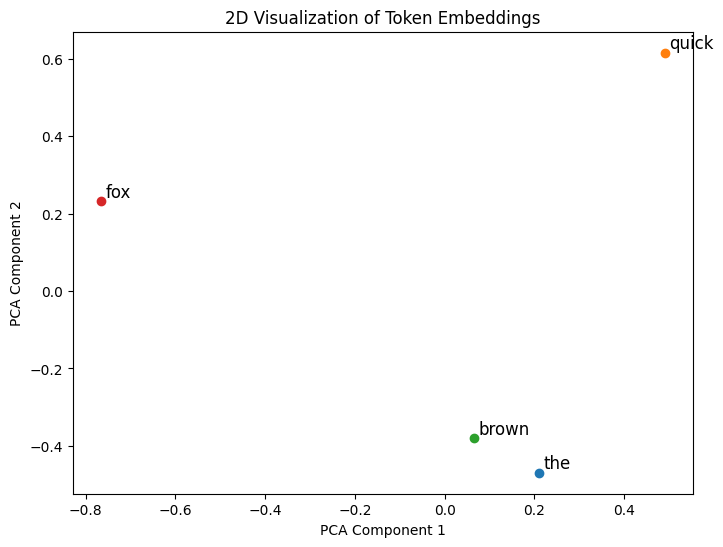

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get embeddings for a subset of tokens
tokens_to_visualize = ['the', 'quick', 'brown', 'fox']
token_ids_to_visualize = tokenizer.convert_tokens_to_ids(tokens_to_visualize)
embedding_vectors = token_embeddings.weight[token_ids_to_visualize].detach().numpy()

# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
embedding_vectors_2d = pca.fit_transform(embedding_vectors)

# Plot the embeddings
plt.figure(figsize=(8, 6))
for i, token in enumerate(tokens_to_visualize):
    x, y = embedding_vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, token, fontsize=12)
plt.title("2D Visualization of Token Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
